<a href="https://colab.research.google.com/github/Menkallinan/digital-image-processing/blob/main/project/project_part5/bounding_box_GT_fruits_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!rm -rf digital-image-processing
!git clone https://github.com/Menkallinan/digital-image-processing.git

Cloning into 'digital-image-processing'...
remote: Enumerating objects: 688, done.
remote: Counting objects: 100% (279/279), done.
remote: Compressing objects: 100% (229/229), done.
remote: Total 688 (delta 32), reused 220 (delta 14), pack-reused 409 (from 1)
Receiving objects: 100% (688/688), 605.94 MiB | 21.57 MiB/s, done.
Resolving deltas: 100% (36/36), done.
Updating files: 100% (329/329), done.


# Crie um NB para gerar bounding box (bounding rectangle) nas imagens

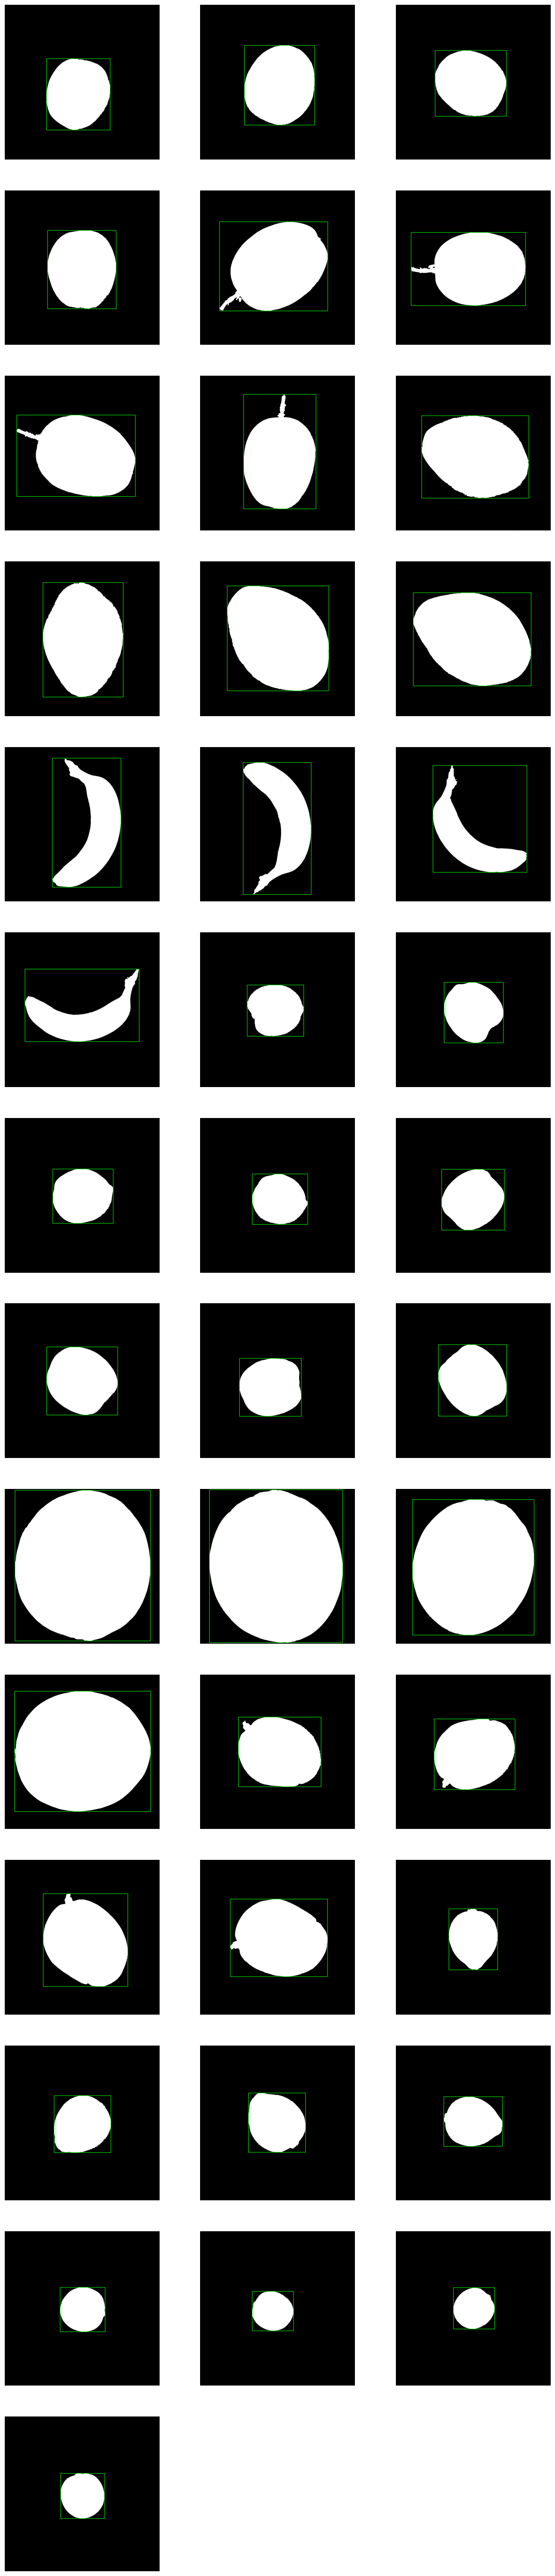

Images with bounding boxes saved to ./output_images/


In [3]:
import cv2
import os
import matplotlib.pyplot as plt

# Diretório principal das imagens
base_dir = '/content/digital-image-processing/project/project_part5/ground_truth_fruits'

# Diretório para salvar as imagens com os bounding boxes
output_images_dir = './output_images/'

# Cria o diretório para as imagens de saída, se não existir
if not os.path.exists(output_images_dir):
    os.makedirs(output_images_dir)

# Função para processar imagens, gerar bounding boxes e salvar as imagens com os contornos
def process_image(image_path):
    # Carregar a imagem em escala de cinza
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Aplicar thresholding
    _, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    # Encontrar contornos na imagem thresholded
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Converter imagem para BGR para desenhar os contornos em cores
    image_with_boxes = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    # Definir um tamanho mínimo para as caixas, Serve para eliminar ruidos futuramente
    min_width = 10
    min_height = 10

    # Para cada contorno, calcular o bounding box e desenhar
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if w >= min_width and h >= min_height:
            # Desenhar o bounding box na imagem
            cv2.rectangle(image_with_boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)

    return image_with_boxes

# Função para processar todas as imagens e salvar as imagens com bounding boxes
def process_all_images_and_save(base_dir, output_images_dir):
    images = []

    for root, dirs, files in os.walk(base_dir):
        for file_name in files:
            if file_name.endswith('.png'):  # Assumindo que as imagens são .png
                image_path = os.path.join(root, file_name)
                image_with_boxes = process_image(image_path)

                # Salvar a imagem com os bounding boxes
                output_image_path = os.path.join(output_images_dir, file_name)
                cv2.imwrite(output_image_path, image_with_boxes)

                # Carregar imagem para exibição posterior
                images.append(image_with_boxes)

    return images

# Processar todas as imagens e obter a lista de imagens processadas
images = process_all_images_and_save(base_dir, output_images_dir)

# Mostrar todas as imagens em uma montagem
n_images = len(images)
cols = 3
rows = (n_images // cols) + 1

plt.figure(figsize=(15, 5 * rows))

for i, img in enumerate(images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.show()

print(f"Images with bounding boxes saved to {output_images_dir}")
